# Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# generating random data having Linear relationships 
np.random.seed(50)

sales = 2*np.random.randn(50) + 50
advertising = 20*sales+3+np.random.randint(10,40, size = len(sales))

data = np.array([sales, advertising])
data = pd.DataFrame(data = data.T, columns = ['sales', 'advertising'])

In [3]:
data

,sales,advertising
0,46.879296,961.585916
1,49.938045,1014.760896
2,48.758143,994.162863
3,47.070839,981.416781
4,52.823892,1087.477845
5,49.046536,1019.930714
6,48.439062,1005.781231
7,52.140535,1083.810709
8,47.435415,969.708296
9,47.345042,974.900844


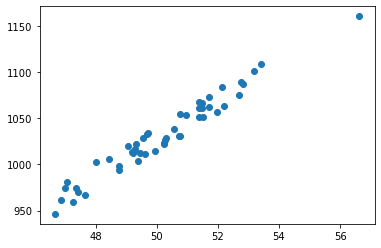

In [4]:
plt.scatter(data['sales'], data['advertising'])

In [5]:
# Calculating the regression coefficients

coeff_a = sum(advertising*(sales - np.mean(sales))) / sum((sales-np.mean(sales))**2)
coeff_b = np.mean(advertising) - coeff_a * np.mean(sales)

In [6]:
print("The regression coefficients are : ", coeff_a, coeff_b)

The regression coefficients are :  20.76275886890265 -10.300055059918577


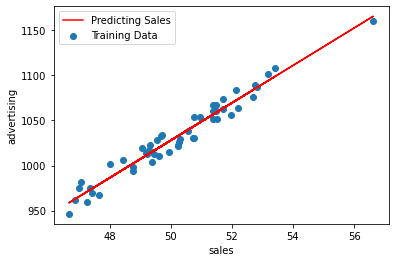

In [7]:
#predicting the data 
y_pred = coeff_a * sales + coeff_b
plt.plot(sales, y_pred, color = 'red', label = 'Predicting Sales')
plt.scatter(data['sales'], data['advertising'], label = 'Training Data')
plt.xlabel('sales')
plt.ylabel('advertising')
plt.legend()

# Predicting House Price using Linear Regression

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/antra0497/Udacity-Predicting-Boston-Housing-Prices/master/housing.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB


In [9]:
x = df.drop('MEDV', axis = 1) # define independent predictor set (excluding the dependent variable)
y = df['MEDV'] # define the target values (i.e. the dependent variable)

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 5)
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(327, 3)
(327,)
(162, 3)
(162,)


# Basic Linear Regression
In linear regression we assume that the relationship between the independent variables (X) and the dependent variable (Y) is linear and then go about finding one that minimizes the squared error between the predicted Y and the actual Y.

                                                    yi=β0+β1xi+ϵi
 
We now import the LinearRegression method from the sklearn library. Note that the process of creating the model involves the very simple command lm.fit(X,Y). This runs the model and we find the intercept-term,  β0 , and the coefficient  β1  that minimizes the squared errors

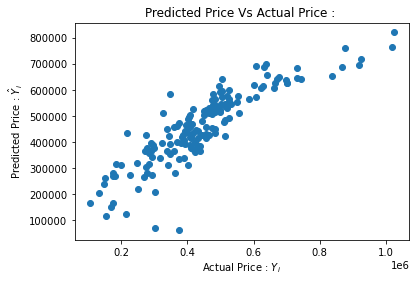

In [11]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred_train = lm.predict(x_train)
y_pred = lm.predict(x_test)

import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Price : $Y_i$")
plt.ylabel("Predicted Price : $\hat{Y}_i$")
plt.title("Predicted Price Vs Actual Price : ")
plt.show()

In [12]:
# Coefficient

print("Intercept Term : ", lm.intercept_)
print("Coefficients : ", lm.coef_)

Intercept Term :  505133.9949769226
Coefficients :  [ 77880.11980519 -11070.7718746  -21000.37109466]


In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error : ", mse)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error : ", mae)
rsq = r2_score(y_train, y_pred_train) # On training data
print("R-Square, Training : ", rsq)
rsq = r2_score(y_test, y_pred) # on test data 
print("R-Square, Test : ", rsq)

Mean Squared Error :  7068706653.230068
Mean Absolute Error :  64577.672957157796
R-Square, Training :  0.6993419964520498
R-Square, Test :  0.746591067836508



# Boston House Price Prediction using Tensorflow


In [14]:
# Import Dependencies
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
# Load Dataset
housing = load_boston()

# Print out the Dataset
print(housing)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

C:\Users\Kushal Raj Sharma\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

In [17]:
# Seperate Data into Features and Labels
# Features
features_df = pd.DataFrame(np.array(housing.data), columns=[housing.feature_names])

features_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [18]:
features_df.shape


(506, 13)

In [19]:
features_df.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


In [20]:
# Labels
labels_df = pd.DataFrame(np.array(housing.target), columns=['labels'])
labels_df.head()

,labels
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [21]:
type(features_df), type(labels_df)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [22]:
features_df.shape 

(506, 13)

In [23]:
labels_df.shape

(506, 1)

In [24]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   (CRIM,)     506 non-null    float64
 1   (ZN,)       506 non-null    float64
 2   (INDUS,)    506 non-null    float64
 3   (CHAS,)     506 non-null    float64
 4   (NOX,)      506 non-null    float64
 5   (RM,)       506 non-null    float64
 6   (AGE,)      506 non-null    float64
 7   (DIS,)      506 non-null    float64
 8   (RAD,)      506 non-null    float64
 9   (TAX,)      506 non-null    float64
 10  (PTRATIO,)  506 non-null    float64
 11  (B,)        506 non-null    float64
 12  (LSTAT,)    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [25]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   labels  506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


### Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, labels_df, test_size = 0.3, random_state = 5)

In [27]:
x_train.shape

(354, 13)

In [28]:
y_train.shape


(354, 1)

In [29]:
x_test.shape


(152, 13)

In [30]:
y_test.shape

(152, 1)

# Data Preprocessing 

In [31]:
# Normalize data
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing


In [32]:
# Define the Preprocessing Method and Fit Training Data to it
scaler = StandardScaler()
scaler.fit(x_train)

C:\Users\Kushal Raj Sharma\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


StandardScaler()

In [33]:
# Make X_train to be the Scaled Version of Data
# This process scales all the values in all 6 columns and replaces them with the new values
x_train = pd.DataFrame(data=scaler.transform(x_train), columns=x_train.columns, index=x_train.index)

C:\Users\Kushal Raj Sharma\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [34]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
445,0.875509,-0.499618,1.069608,-0.251124,1.645428,0.233772,0.969882,-0.900522,1.654486,1.538813,0.810913,-3.463820,1.611369
428,0.474665,-0.499618,1.069608,-0.251124,1.113435,-0.149715,0.383159,-0.926152,1.654486,1.538813,0.810913,-2.872888,1.265636
481,0.273444,-0.499618,1.069608,-0.251124,-0.168580,0.653301,0.270733,-0.241993,1.654486,1.538813,0.810913,0.389957,-0.671032
55,-0.417342,3.445319,-1.442682,-0.251124,-1.293614,1.372699,-1.591321,2.387078,-0.527917,-1.061095,-0.265106,0.421447,-1.082820
488,-0.400634,-0.499618,2.504352,-0.251124,0.502952,-1.215116,0.896102,-0.982361,-0.642780,1.804713,0.764129,0.412198,0.779361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.271452,-0.499618,1.069608,-0.251124,0.276201,-0.263608,0.442885,-0.137024,1.654486,1.538813,0.810913,0.385663,0.346492
189,-0.408780,1.472851,-1.112274,-0.251124,-0.997094,1.280432,-0.994058,0.363219,-0.527917,-0.044767,-1.528259,0.432127,-1.001306
495,-0.397222,-0.499618,-0.182072,-0.251124,0.293643,-0.903713,-1.348902,-0.503239,-0.413054,-0.086129,0.343078,0.392379,0.714712
206,-0.391072,-0.499618,-0.048122,-0.251124,-0.543592,0.042029,-0.516248,0.259426,-0.642780,-0.759742,0.062378,0.409776,-0.217082


In [35]:
# lets convert pandas  dataframe to numpy array 
x_train = np.array(x_train)
y_train = np.array(y_train)

In [36]:
# lets check whether it is converted into numpy or not
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [37]:
# Apply same Normalization for Test Features
scal = StandardScaler()
scal.fit(x_test)

C:\Users\Kushal Raj Sharma\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


StandardScaler()

In [38]:
# Make X_test to be the Scaled Version of Data
# This process scales all the values in all columns and replaces them with the new values
x_test = pd.DataFrame(data=scal.transform(x_test), columns=x_test.columns, index=x_test.index)

C:\Users\Kushal Raj Sharma\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [39]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
226,-0.385617,-0.462563,-0.765365,-0.318511,-0.496400,2.477336,0.544070,-0.226759,-0.165979,-0.646530,-0.463706,0.358359,-1.373735
292,-0.422644,2.817184,-0.940677,-0.318511,-1.285114,0.519142,-1.789897,0.621166,-0.626780,-1.019641,0.346964,0.461784,-1.154674
90,-0.421500,-0.462563,-1.156662,-0.318511,-0.623612,0.223330,-0.210493,-0.281800,-0.857181,-0.869193,-0.283557,0.410506,-0.581211
373,0.762239,-0.462563,0.903603,-0.318511,0.894451,-1.875131,1.043413,-1.137352,1.677224,1.513902,0.797337,0.461784,3.040957
273,-0.402767,0.357374,-0.658776,3.139609,-0.835632,1.992648,-0.739427,0.286546,-0.741980,-1.152035,0.076741,0.395188,-0.892360
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,-0.410532,0.562358,-0.915432,-0.318511,-0.928921,-0.715492,-0.206794,1.561733,-0.165979,-0.784942,0.572151,0.442337,0.024344
108,-0.412812,-0.462563,-0.434377,-0.318511,-0.360707,0.302491,0.936147,-0.575920,-0.511580,-0.183151,1.112597,0.443750,-0.098441
298,-0.419592,2.407215,-1.320753,-0.318511,-1.378403,0.123337,-1.911958,1.830429,-0.511580,-0.339616,-1.634674,0.150424,-1.117002
138,-0.399779,-0.462563,1.435149,-0.318511,0.521296,-0.554392,0.976834,-0.916829,-0.626780,0.135799,1.247709,0.408985,1.164294


In [40]:
x_test = np.array(x_test)
y_test = np.array(y_test)

In [41]:
type(x_train), type(y_train)

(numpy.ndarray, numpy.ndarray)

In [42]:
print (len(x_train),len(x_test),len(y_train),len(y_test))

354 152 354 152


# Define Feature Columns for Linear Regressor


In [43]:
features_df.columns

MultiIndex([(   'CRIM',),
            (     'ZN',),
            (  'INDUS',),
            (   'CHAS',),
            (    'NOX',),
            (     'RM',),
            (    'AGE',),
            (    'DIS',),
            (    'RAD',),
            (    'TAX',),
            ('PTRATIO',),
            (      'B',),
            (  'LSTAT',)],
           )

In [44]:
# Make feature columns 
feat_cols = [tf.feature_column.numeric_column('x', shape=np.array(x_train).shape[1:])]


In [45]:

# Making input functions
input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=1, num_epochs=2000, shuffle=True)


In [46]:

# Define Linear Regressor Model
linear_model = tf.estimator.LinearRegressor(feature_columns=feat_cols, optimizer='Adam')


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\KUSHAL~1\\AppData\\Local\\Temp\\tmpbetxdlj8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [47]:
# Set up Estimator Training Inputs
train_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn(x_train, y_train, batch_size = 1, num_epochs = 1000, shuffle = False)

In [57]:
# Set up Estimator Testing Inputs
eval_input_func = tf.compat.v1.estimator.inputs.numpy_input_fn({'x' : x_test}, y_test, batch_size = 1, num_epochs = 1, shuffle = False)

In [58]:
# Train the Linear regressor estimator
linear_model.train(input_fn = input_func, steps = 2000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\KUSHAL~1\AppData\Local\Temp\tmpbetxdlj8\model.ckpt-2000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 2000...
INFO:tensorflow:

In [59]:
test_metrics = linear_model.evaluate(input_fn = eval_input_func, steps = 2000)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2022-02-10T12:54:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\KUSHAL~1\AppData\Local\Temp\tmpbetxdlj8\model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.29155s
INFO:tensorflow:Finished evaluation at 2022-02-10-12:54:22
INFO:tensorflow:Saving dict for global step 400

In [60]:
# Lets calculate the predicted value
list(linear_model.predict(input_fn = eval_input_func))

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\KUSHAL~1\AppData\Local\Temp\tmpbetxdlj8\model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([40.68284], dtype=float32)},
 {'predictions': array([31.554699], dtype=float32)},
 {'predictions': array([28.544626], dtype=float32)},
 {'predictions': array([4.8447056], dtype=float32)},
 {'predictions': array([35.71012], dtype=float32)},
 {'predictions': array([2.7373486], dtype=float32)},
 {'predictions': array([27.648514], dtype=float32)},
 {'predictions': array([31.919151], dtype=float32)},
 {'predictions': array([28.238222], dtype=float32)},
 {'predictions': array([24.0307], dtype=float32)},
 {'predictions': array([34.662785], dtype=float32)},
 {'predictions': array([22.980503], dtype=float32)},
 {'predictions': array([24.163229], dtype=float32)},
 {'predictions': array([35.480255], dtype=float32)},
 {'predictions': array([29.161076], dtype=float32)},
 {'predictions': array([17.697596], dtype=float32)},
 {'predictions': array([-3.0982437], dtype=float32)},
 {'predictions': array([19.84588], dtype=float32)},
 {'predictions': array([14.70575], dtype=float32)}

In [61]:
# Predictions
predictions = linear_model.predict(input_fn=eval_input_func)

In [62]:
pred = list(predictions)

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\KUSHAL~1\AppData\Local\Temp\tmpbetxdlj8\model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [63]:
# Plot Predicted Values
predicted_vals = []

for pred in linear_model.predict(input_fn=eval_input_func):
    predicted_vals.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\KUSHAL~1\AppData\Local\Temp\tmpbetxdlj8\model.ckpt-4000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [64]:
len(predicted_vals), len(y_test)

(152, 152)

In [65]:
print(predicted_vals)

[array([40.68284], dtype=float32), array([31.554699], dtype=float32), array([28.544626], dtype=float32), array([4.8447056], dtype=float32), array([35.71012], dtype=float32), array([2.7373486], dtype=float32), array([27.648514], dtype=float32), array([31.919151], dtype=float32), array([28.238222], dtype=float32), array([24.0307], dtype=float32), array([34.662785], dtype=float32), array([22.980503], dtype=float32), array([24.163229], dtype=float32), array([35.480255], dtype=float32), array([29.161076], dtype=float32), array([17.697596], dtype=float32), array([-3.0982437], dtype=float32), array([19.84588], dtype=float32), array([14.70575], dtype=float32), array([5.162443], dtype=float32), array([1.7172527], dtype=float32), array([19.282635], dtype=float32), array([41.79033], dtype=float32), array([25.750322], dtype=float32), array([33.782417], dtype=float32), array([11.057711], dtype=float32), array([26.487164], dtype=float32), array([24.722708], dtype=float32), array([25.012962], dtype=f

# Calculate MeanSquared Error

In [66]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(predicted_vals, y_test)

print("Mean Squared Error [Linear Regressor] : ", mse)

Mean Squared Error [Linear Regressor] :  37.339186560203
